<a href="https://colab.research.google.com/github/the-redlord/Image_denoising-keras/blob/master/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: PROJECT OVERVIEW

![image1](images/image1.png)

![image2](images/image2.png)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tensorflow.keras.layers import Conv2D,Conv2DTranspose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load dataset 
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

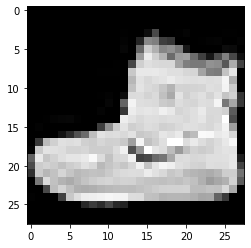

In [ ]:
# Visualize a sample image
plt.imshow(X_train[0],cmap='gray')

In [ ]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [ ]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

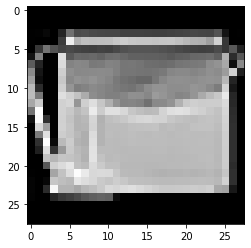

In [ ]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap='gray')

In [ ]:
label = y_train[i]
label

8

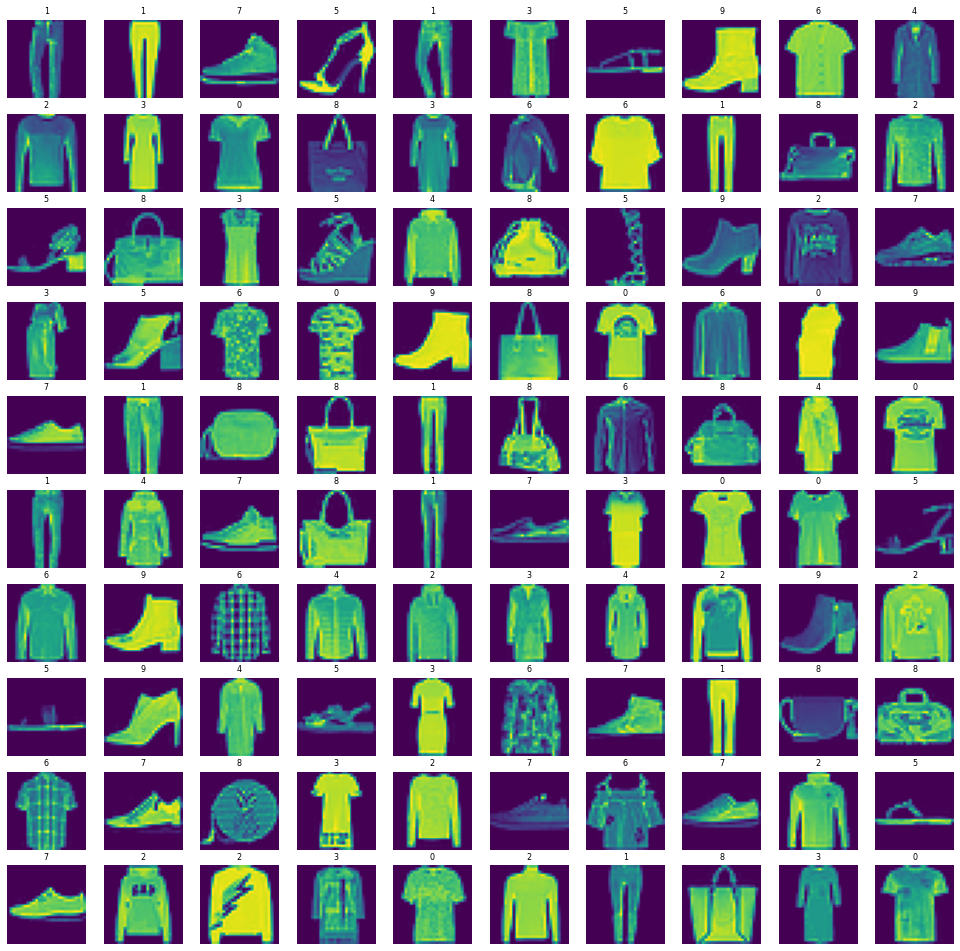

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0,W_grid * L_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')

# TASK #4: PERFORM DATA PREPROCESSING

In [ ]:
# normalize data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_img = img + noise_factor * np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img,0,1)
  noise_dataset.append(noisy_img)

In [ ]:
noise_dataset = np.array(noise_dataset)

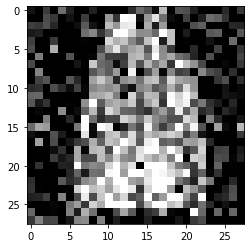

In [ ]:
plt.imshow(noise_dataset[22], cmap='gray')

In [ ]:
# add noise to testing dataset
noise_factor = 0.1

noise_test_dataset = []

for img in X_test:
  noisy_img = img + noise_factor * np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img,0,1)
  noise_test_dataset.append(noisy_img)

In [ ]:
noise_test_dataset = np.array(noise_test_dataset)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![image3](images/image3.png)

![image4](images/image4.png)

![image5](images/image5.png)

![image6](images/image6.png)

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()

# encoder
autoencoder.add(tf.keras.layers.Input(shape=(28,28,1)))
autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),strides=2,padding='same'))
autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),strides=2,padding='same'))
# image layer
autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),strides=1,padding='same'))

# decoder
autoencoder.add(Conv2DTranspose(filters=16,kernel_size=(3,3),strides=2,padding='same'))
autoencoder.add(Conv2DTranspose(filters=1,kernel_size=(3,3),strides=2,padding='same',activation='sigmoid'))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4011 - val_loss: 0.3153
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3155 - val_loss: 0.3020
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3089 - val_loss: 0.2988
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3060 - val_loss: 0.2947
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3044 - val_loss: 0.2933
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3033 - val_loss: 0.2925
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3027 - val_loss: 0.2921
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3021 - val_loss: 0.2903
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3015 - val_loss: 0.2904
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3010 - val_loss: 0.2879

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))

print('Test accuracy: {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.2879
Test accuracy: 0.288


In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

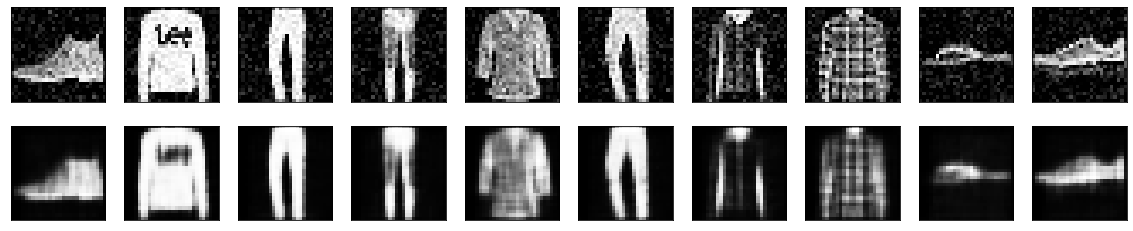

In [ ]:
tfig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot